## Module5-HW

- Use the `train.csv` data to train and `test.csv` data to report your testing results.
- Your target variable is `SalePrice`
- Report summary information about your data:
- - Report min, max, mean of your numerical features (use `describe` method)
- - Create scatter (with respect to target variable) and box plots of your variables
- - Check the correlations between your variables and the target variable

- Split your data into train and test (Keep in mind that this test data will only be used for training purposes. you are going to report your test result on the `test.csv` file, not on this test data that you obtained from the training data)
- Train your transformers on the train data set. You may choose to use pipeline and column transformer at this step.
- - scaler
- - polynomial transformer
- - OneHot Encoder
- - Simple Imputer
- Train Linear regression. Ridge Regression, and Lasso Regression models
- Optimize the `alpha` parameter for Ridge and Lasso Regressors
- Visualize the coefficients of the three models as we did in class
- Check which variables are eliminated with Lasso regression. Check the correlation values for these eliminated variables (you got the correlation values from an earlier step)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [5]:
numerical_features = ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
categorical_features = ['Neighborhood', 'MSZoning']

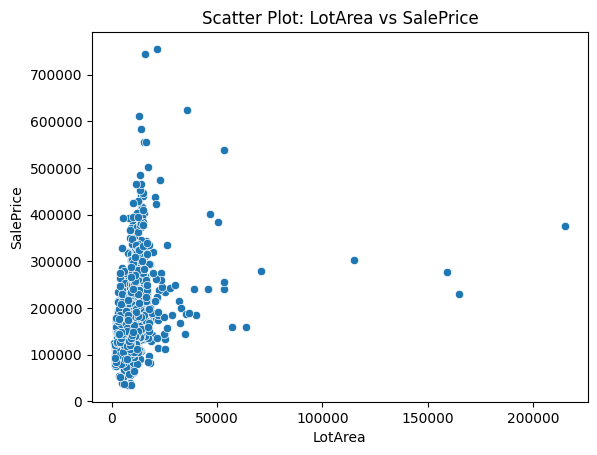

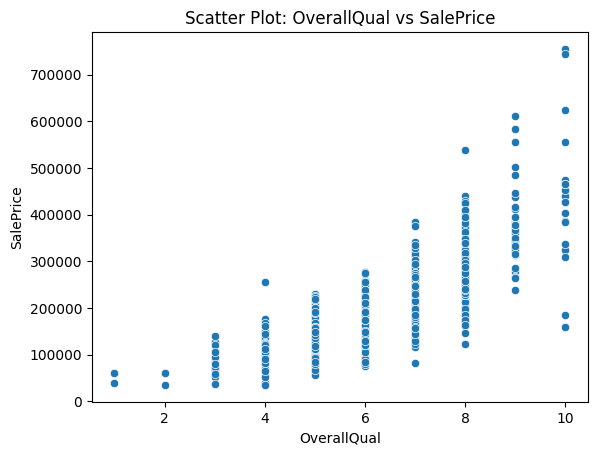

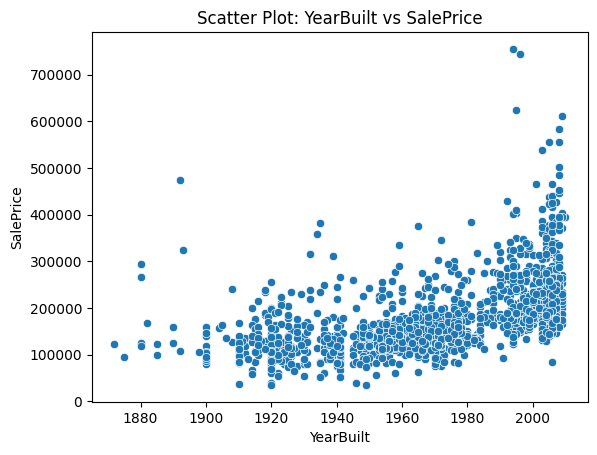

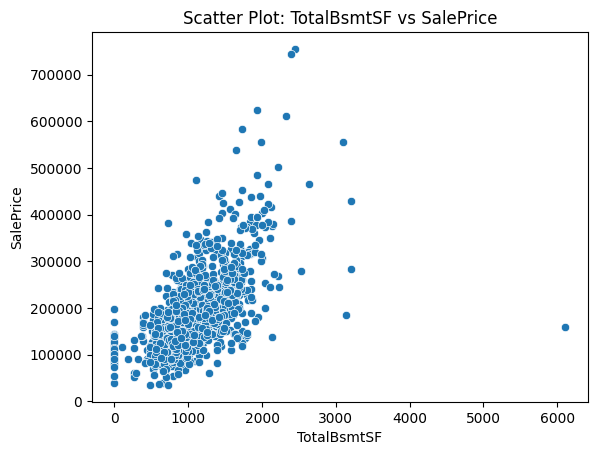

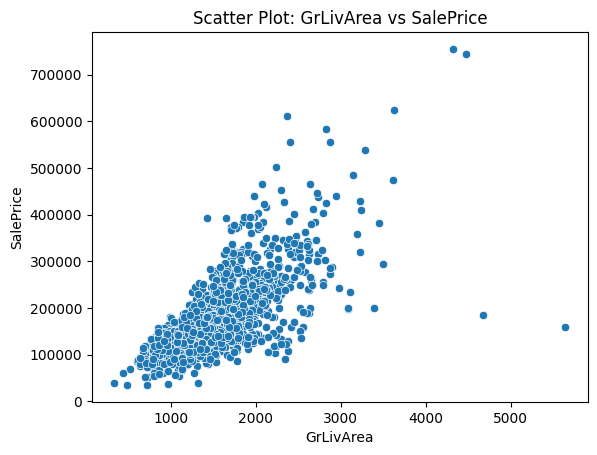

In [6]:
# Creating scatter plots for numerical features
for feature in numerical_features:
    sns.scatterplot(x=train_data[feature], y=train_data['SalePrice'])
    plt.title(f'Scatter Plot: {feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

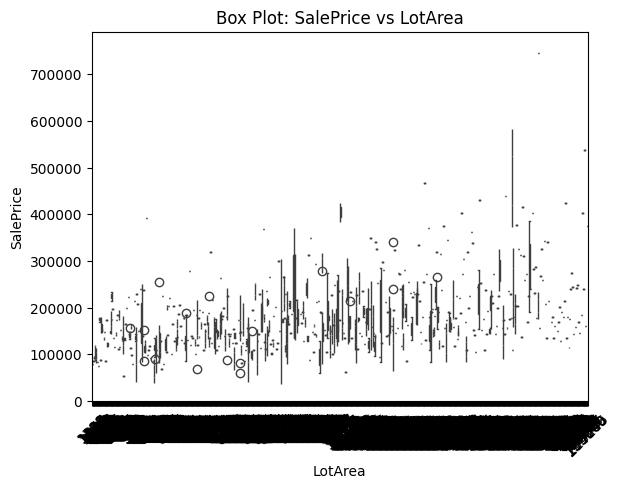

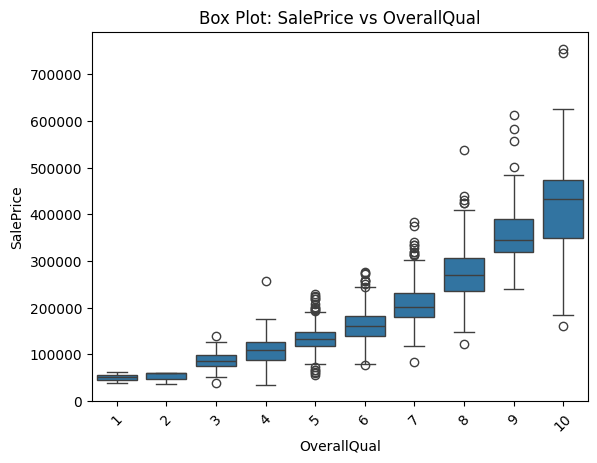

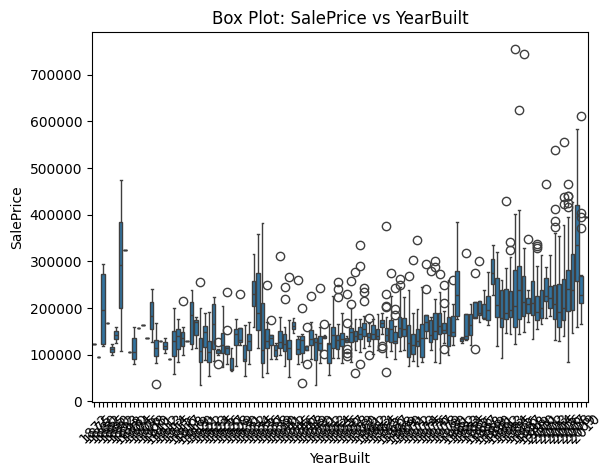

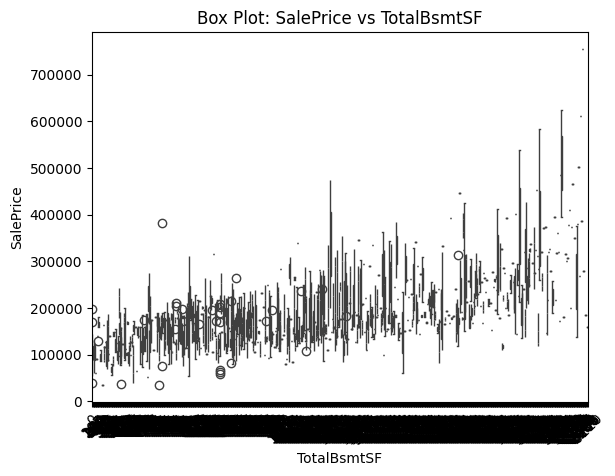

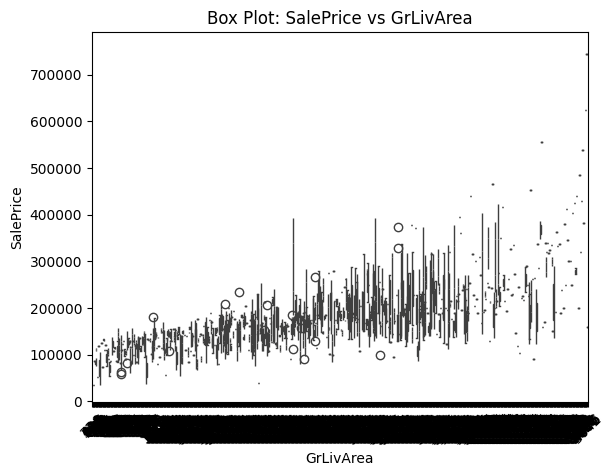

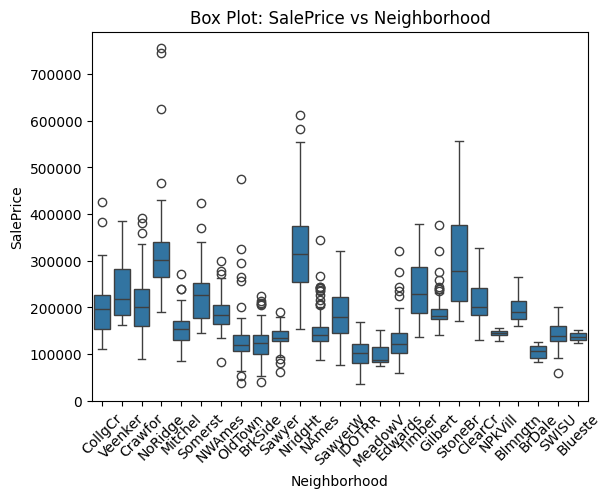

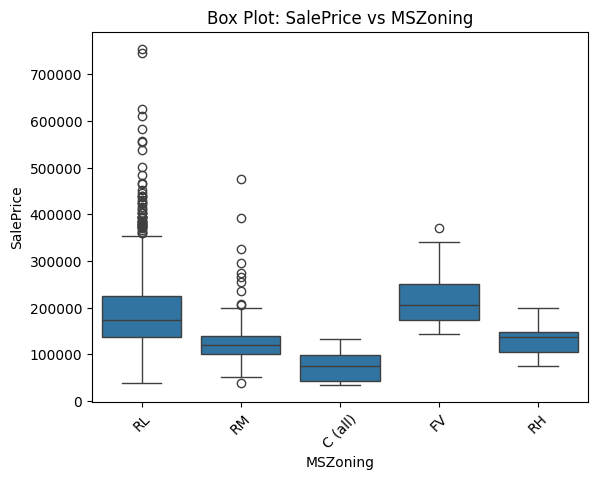

In [7]:
# Creating box plots for numerical and categorical features
for feature in numerical_features + categorical_features:
    sns.boxplot(y=train_data['SalePrice'], x=train_data[feature])
    plt.title(f'Box Plot: SalePrice vs {feature}')
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.xticks(rotation=45)  # Rotating labels for better readability if categorical
    plt.show()

In [12]:
# Select only the numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Focus on the correlation with the target variable 'SalePrice'
saleprice_correlation = correlation_matrix['SalePrice']

# Print the correlations with 'SalePrice'
print(saleprice_correlation)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_data = train_data.drop(['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'YrSold'], axis=1)

In [15]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1168, 73)
Test set shape: (292, 73)


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [19]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [20]:
# Create transformers for the numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [26]:
# Create a pipeline that processes the data and then runs the regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Start with Linear Regression
])

In [27]:
# Use GridSearchCV to find the best parameters for Ridge and Lasso
param_grid = {
    'model': [Ridge(), Lasso()],
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.793e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+10, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.349e+10, tolerance: 5.256e

Best parameters: {'model': Lasso(alpha=100), 'model__alpha': 100}
Best cross-validation score: 1642033422.59


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
